<a href="https://colab.research.google.com/github/riz330/Machine-Learning-Ravet/blob/main/Regression_keras(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neural Network - Linear Regression

Regression With Keras

In [2]:
import pandas as pd

In [3]:
from warnings import filterwarnings
filterwarnings("ignore")

In [4]:
url1="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv"

Step 1- Data Ingestion

In [5]:
df=pd.read_csv(url1)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


### Target Feature- PE
1 Input AT- Atmospheric Temperature
2.V- Vaccum Pressure
3 AP - Atmospheric Pressure
4 RH - Relative Humidity

Step 3 - Perform Data Quality Check

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [7]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [8]:
df.duplicated().sum()

41

In [9]:
df=df.drop_duplicates(keep="first").reset_index(drop=True)

In [10]:
df.duplicated().sum()

0

Seperate X And Y

In [11]:
X=df.drop(columns=["PE"])

In [12]:
Y=df[["PE"]]

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [14]:
num_pipe=make_pipeline(SimpleImputer(strategy="mean"),StandardScaler()).set_output(transform="pandas")

In [15]:
X_pre=num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


Apply Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y,test_size=0.2,random_state=42)

In [18]:
xtrain.head()

,AT,V,AP,RH
5695,-0.152905,0.324507,0.089713,1.817999
7300,-1.497611,-1.153542,0.323712,0.908830
9066,-0.885038,-0.954892,0.293410,0.988245
6424,1.398679,1.223949,-0.479290,-1.082031
6773,-0.824586,-0.942279,0.796758,1.506499


In [19]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6308,-1.501641,-1.244984,0.044260,-0.467246
8021,-1.465370,-1.418408,0.399466,-1.082031
9483,0.150695,0.648495,0.731104,-0.002393
4459,-0.036032,1.128565,-0.361449,1.586599


In [20]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [21]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [22]:
xtrain.shape

(7621, 4)

In [23]:
xtest.shape

(1906, 4)

Building Neural Network

In [1]:
from keras.models import Sequential
from keras.layers import Input,Dense

In [25]:
# Initialize Neural Network
model=Sequential()

# Add Input Layer
model.add(Input(shape=(xtrain.shape[1],)))
#Add Hidden Layer 1
model.add(Dense(units=8,activation="relu"))
# Add Hidden Layer 2
model.add(Dense(units=4,activation="relu"))

# Output Layer
model.add(Dense(units=1,activation="linear"))

model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss="mse",optimizer="adam",metrics=["mae"])

In [27]:
hist=model.fit(xtrain,ytrain,validation_split=0.2,epochs=100)

Epoch 1/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 206346.3594 - mae: 453.9468 - val_loss: 203136.9375 - val_mae: 450.3956
Epoch 2/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 202391.9062 - mae: 449.5818 - val_loss: 194058.2031 - val_mae: 440.2105
Epoch 3/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 190715.5469 - mae: 436.3600 - val_loss: 172545.3906 - val_mae: 414.8211
Epoch 4/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 166350.1875 - mae: 407.0686 - val_loss: 137411.5625 - val_mae: 368.8287
Epoch 5/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 129530.5547 - mae: 357.2372 - val_loss: 95957.6953 - val_mae: 303.7063
Epoch 6/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 89044.4375 - mae: 290.6959 - val_loss: 59676.5000 - val_mae: 228.5642
Epoch 7/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56151.9258 - mae: 220.0775 - val_loss: 36598.0781 - val_mae: 168.9547
Epoch 8/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 35134.7305 - 

In [33]:
import matplotlib.pyplot as plt


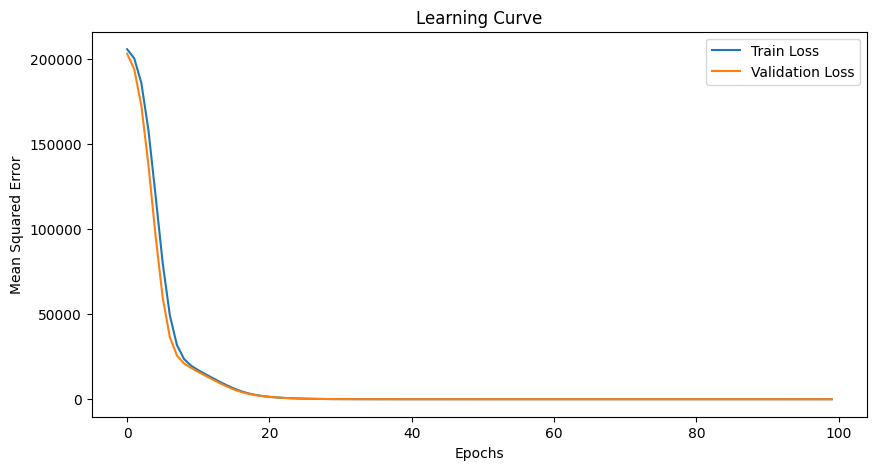

In [34]:
plt.figure(figsize=(10,5))
plt.plot(hist.history["loss"],label="Train Loss")
plt.plot(hist.history["val_loss"],label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.show()


### Evaluate The Model

In [35]:
model.evaluate(xtrain,ytrain)

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19.9167 - mae: 3.5564


[20.15945053100586, 3.5508317947387695]

In [36]:
model.evaluate(xtest,ytest)

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 19.2355 - mae: 3.4938


[20.39548683166504, 3.587794780731201]

In [37]:
ypred_train=model.predict(xtrain)
ypred_test=model.predict(xtest)

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [38]:
ypred_train[0:5]

array([[451.5437 ],
       [478.02277],
       [468.07904],
       [432.77887],
       [465.9567 ]], dtype=float32)

In [39]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [40]:
ypred_test[0:5]

array([[427.49203],
       [480.38226],
       [483.0044 ],
       [450.6643 ],
       [448.09457]], dtype=float32)

In [41]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [42]:
from sklearn.metrics import r2_score

In [43]:
r2_score(ytrain,ypred_train)

0.9298619031906128

In [44]:
r2_score(ytest,ypred_test)

0.9324182271957397

Step 8 - Out Of Sample Prediction

In [45]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv"
print(url2)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv


In [46]:
xnew=pd.read_csv(url2)

In [47]:
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [48]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [49]:
xnew_pre=num_pipe.transform(xnew)
xnew_pre

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908
...,...,...,...,...
95,0.898948,1.197147,-0.805877,-0.196139
96,-1.058331,-1.129893,-0.314313,0.658261
97,-1.885843,-1.017956,1.291690,0.881445
98,0.712221,1.631496,-0.839546,0.491899


In [50]:
preds=model.predict(xnew_pre)
preds[0:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[445.78384],
       [440.10757],
       [431.44556],
       [440.49603],
       [473.33636]], dtype=float32)

In [51]:
xnew["PE_pred"] = preds.round(2)

In [52]:
xnew

,AT,V,AP,RH,PE_pred
0,22.49,58.82,1009.73,85.19,445.779999
1,28.88,54.89,1007.16,46.60,440.109985
2,27.89,73.21,1001.32,85.88,431.450012
3,25.69,62.26,1011.38,74.08,440.500000
4,12.16,40.81,1025.79,70.97,473.339996
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,438.140015
96,11.78,39.96,1011.37,82.95,471.859985
97,5.62,41.38,1020.91,86.21,483.720001
98,24.96,74.99,1008.25,80.52,438.079987


In [53]:
xnew.to_csv("Results.csv", index=False)

In [54]:
model.save("PowerModel.keras")


In [55]:
from keras.models import load_model

In [56]:


m = load_model("/content/PowerModel.keras")
m.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)